In [3]:
!pip install mysql-connector-python

In [5]:
import mysql.connector

user = 'root'
password = 'camanchaca2000'
host = 'localhost'
database = 'world' 

try:
    
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    
    
    if conn.is_connected():
        print("¡Conexión exitosa a la base de datos!")
        # Aquí crearías un cursor y ejecutarías consultas
        
except mysql.connector.Error as e:
    print(f"Error al conectar a MySQL: {e}")

finally:
    # Cerrar la conexión
    if 'conn' in locals() and conn.is_connected():
        conn.close()
        print("Conexión cerrada.")

¡Conexión exitosa a la base de datos!
Conexión cerrada.


In [6]:
!pip install pandas 

In [9]:
df1 = ejecutar_consulta("""
    SELECT Name, Population
    FROM country
    WHERE Continent = 'Europe';
""")
df1.head(15)

#Ejercicio 1:** Escribe una consulta para mostrar el nombre y la población de todos
##los países del continente europeo


,Name,Population
0,Albania,3401200
1,Andorra,78000
2,Austria,8091800
3,Belgium,10239000
4,Bulgaria,8190900
5,Bosnia and Herzegovina,3972000
6,Belarus,10236000
7,Switzerland,7160400
8,Czech Republic,10278100
9,Germany,82164700


In [10]:
df2 = ejecutar_consulta("""
    SELECT Name, SurfaceArea
    FROM country
    ORDER BY SurfaceArea DESC
    LIMIT 5;
""")
df2

##Ejercicio 2:** Escribe una consulta para mostrar los nombres y las áreas de 
##superficie de los cinco países más grandes del mundo (en términos de área de superficie)

,Name,SurfaceArea
0,Russian Federation,17075400.00
1,Antarctica,13120000.00
2,Canada,9970610.00
3,China,9572900.00
4,United States,9363520.00


In [11]:
df3 = ejecutar_consulta("""
    SELECT Continent, SUM(Population) AS PoblacionTotal
    FROM country
    GROUP BY Continent;
""")
df3

##Ejercicio 3:** Escribe una consulta para calcular la población total de todos los
##países de cada continente y mostrar el resultado junto con el nombre del continente

,Continent,PoblacionTotal
0,North America,482993000
1,Asia,3927467700
2,Africa,784475000
3,Europe,730074600
4,South America,345780000
5,Oceania,30401150
6,Antarctica,0


In [13]:
df_europa = ejecutar_consulta("""
    SELECT city.Name AS Ciudad, city.Population AS Poblacion
    FROM city
    JOIN country ON city.CountryCode = country.Code
    WHERE country.Continent = 'Europe'
    ORDER BY city.Population DESC;
""")

df_europa.head(10)


##Ejercicio 4:** Escribe una consulta para mostrar el nombre de las ciudades y la 
##población de todos los países de Europa, ordenados por población de la ciudad de 
##manera descendente

,Ciudad,Poblacion
0,Moscow,8389200
1,London,7285000
2,St Petersburg,4694000
3,Berlin,3386667
4,Madrid,2879052
5,Roma,2643581
6,Kyiv,2624000
7,Paris,2125246
8,Bucuresti,2016131
9,Budapest,1811552


In [18]:
df_china = ejecutar_consulta("""
    SELECT Name, Population
    FROM country
    WHERE Code = 'CHN';
""")

nombre = df_china["Name"].iloc[0]
poblacion = df_china["Population"].iloc[0]

print(f"País: {nombre} | Población actualizada: {poblacion}")

##Ejercicio 5:** Actualiza la población de China (código de país 'CHN') a 
##1500000000 (1.5 mil millones)

País: China | Población actualizada: 1500000000


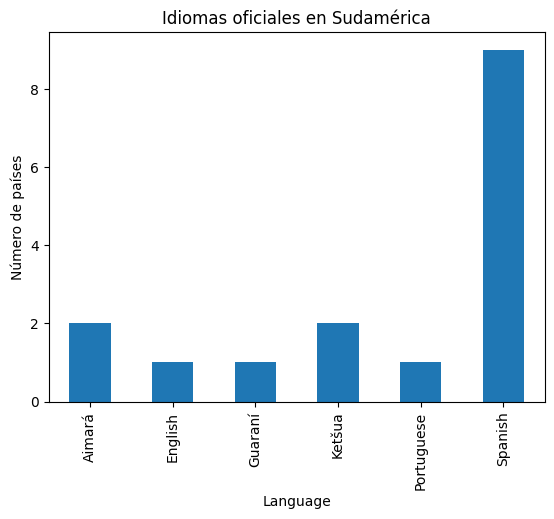

In [17]:
import matplotlib.pyplot as plt

df6 = ejecutar_consulta("""
    SELECT cl.Language, COUNT(DISTINCT c.Code) AS Paises
    FROM countrylanguage cl
    JOIN country c ON cl.CountryCode = c.Code
    WHERE c.Continent = 'South America' AND cl.IsOfficial = 'T'
    GROUP BY cl.Language;
""")
df6.plot(kind="bar", x="Language", y="Paises", legend=False)
plt.ylabel("Número de países")
plt.title("Idiomas oficiales en Sudamérica")
plt.show()

##Ejercicio 6:** Consulta los idiomas oficiales en Sudamérica y gráfica cuántos 
##países comparten cada idioma oficial

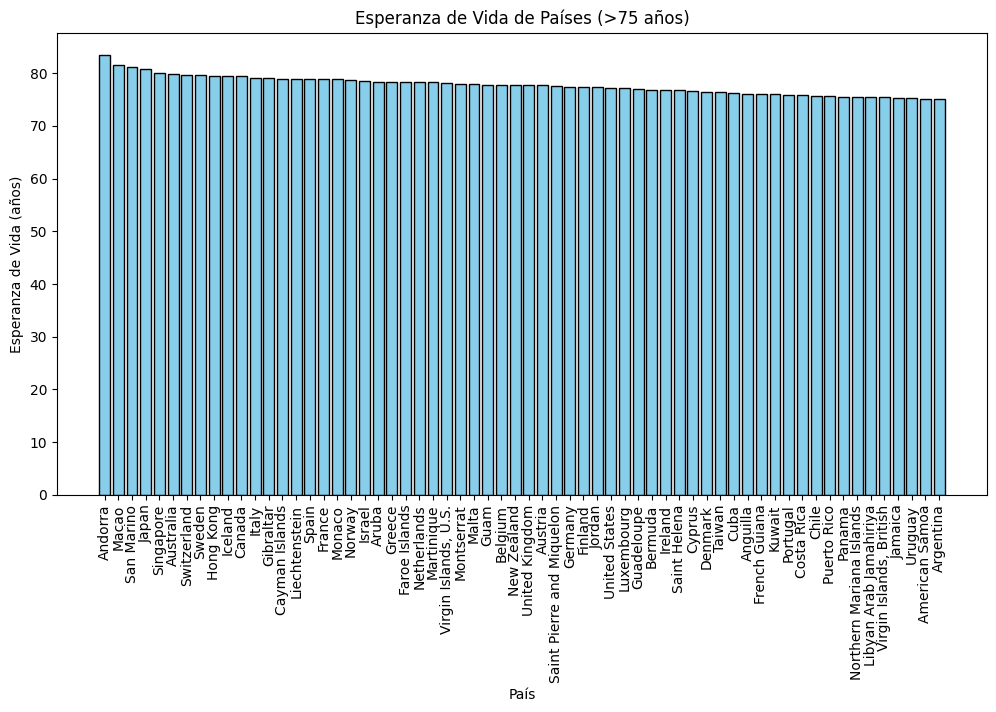

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los países con esperanza de vida > 75 años
df_vida = ejecutar_consulta("""
    SELECT Name, LifeExpectancy
    FROM country
    WHERE LifeExpectancy > 75;
""")

# Convertir LifeExpectancy a numérico
df_vida["LifeExpectancy"] = pd.to_numeric(df_vida["LifeExpectancy"], errors='coerce')

# Ordenar por LifeExpectancy
df_vida = df_vida.sort_values(by="LifeExpectancy", ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_vida["Name"], df_vida["LifeExpectancy"], color='skyblue', edgecolor='black')
plt.xticks(rotation=90)  # Rotar nombres para que se vean
plt.title("Esperanza de Vida de Países (>75 años)")
plt.xlabel("País")
plt.ylabel("Esperanza de Vida (años)")
plt.show()

##Ejercicio 7:** Obtén todos los países con esperanza de vida > 75 años y crea un histograma de su distribución

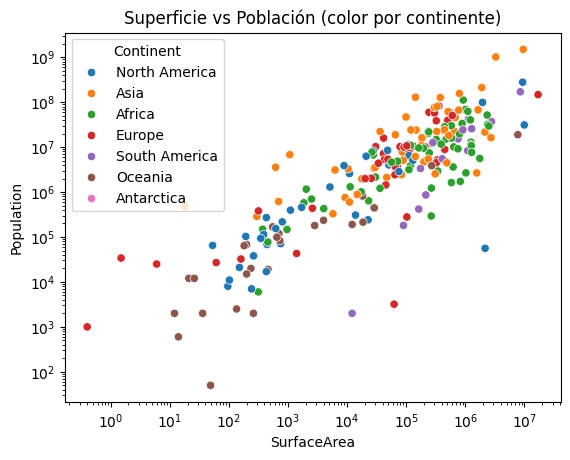

In [22]:
import seaborn as sns

df8 = ejecutar_consulta("""
    SELECT Name, Population, SurfaceArea, Continent
    FROM country;
""")
df8["Densidad"] = df8["Population"] / df8["SurfaceArea"]

sns.scatterplot(data=df8, x="SurfaceArea", y="Population", hue="Continent")
plt.xscale("log")
plt.yscale("log")
plt.title("Superficie vs Población (color por continente)")
plt.show()

##Ejercicio 8:**Calcula la densidad poblacional de todos los países y muestra un gráfico de dispersión entre superficie y
##población con el color como función del continente

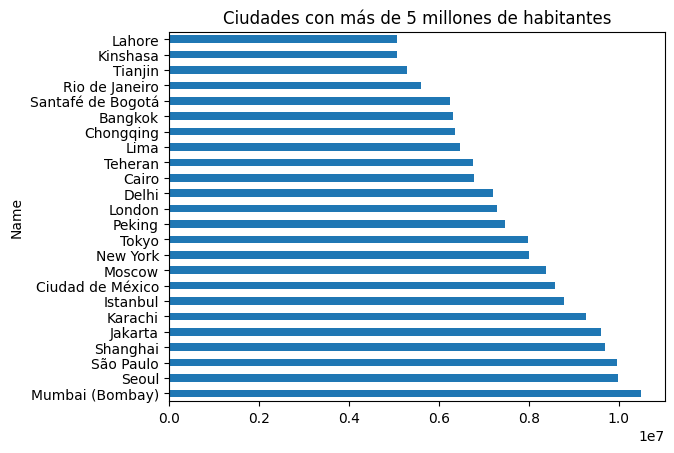

In [23]:
df9 = ejecutar_consulta("""
    SELECT Name, Population
    FROM city
    WHERE Population > 5000000
    ORDER BY Population DESC;
""")
df9.plot(kind="barh", x="Name", y="Population", legend=False)
plt.title("Ciudades con más de 5 millones de habitantes")
plt.show()

##Ejercicio 9:** Visualiza las ciudades con más de 5 millones de habitantes en un gráfico horizontal de barras

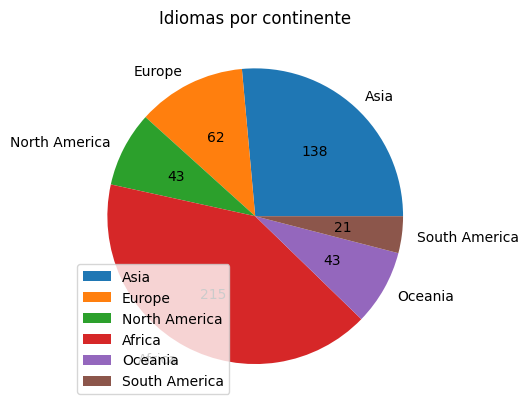

In [25]:
import matplotlib.pyplot as plt

df10 = ejecutar_consulta("""
    SELECT c.Continent, COUNT(DISTINCT cl.Language) AS Idiomas
    FROM countrylanguage cl
    JOIN country c ON cl.CountryCode = c.Code
    GROUP BY c.Continent;
""")

# Función para mostrar valores absolutos en el pie chart
def absolute_value(val):
    total = df10['Idiomas'].sum()
    numero = int(round(val*total/100))
    return str(numero)

df10.set_index("Continent").plot(kind="pie", y="Idiomas", autopct=absolute_value)
plt.title("Idiomas por continente")
plt.ylabel("")
plt.show()
##Ejercicio 10:** Gráfica cuántos idiomas se hablan por continente usando un gráfico de pastel

In [ ]:
#### ANÁLISIS PARA ONG "COSECHA GLOBAL" DE AYUDA HUMANITARIA CON ALIMENTO###

In [47]:
# 1. Consulta SQL para calcular el GNP per cápita en orden ascendente
query_vulnerables_asc = """
SELECT
    Name AS Pais,
    Population AS Poblacion,
    GNP,
    (GNP / Population) AS GNP_per_capita
FROM
    country
WHERE
    GNP IS NOT NULL AND GNP > 0
ORDER BY
    GNP_per_capita ASC;
"""

df_vulnerables_asc = ejecutar_consulta(query_vulnerables_asc)

if df_vulnerables_asc is not None:
    print("Países con baja capacidad económica (orden ascendente de GNP per cápita):")
    print(df_vulnerables_asc.head(20))

Países con baja capacidad económica (orden ascendente de GNP per cápita):
                                     Pais  Poblacion      GNP GNP_per_capita
0                   Sao Tome and Principe     147000     6.00       0.000041
1                                 Somalia   10097000   935.00       0.000093
2                                Ethiopia   62565000  6353.00       0.000102
3                                 Burundi    6695000   903.00       0.000135
4   Congo, The Democratic Republic of the   51654000  6964.00       0.000135
5                              Mozambique   19680000  2891.00       0.000147
6                                  Malawi   10925000  1687.00       0.000154
7                            Sierra Leone    4854000   746.00       0.000154
8                                    Chad    7651000  1208.00       0.000158
9                                   Niger   10730000  1706.00       0.000159
10                                Eritrea    3850000   650.00       0.000169
11

In [54]:
# 2. Consulta SQL para evaluar la esperanza de vida solo de los países más vulnerables
query_esperanza_vida_vulnerables = """
SELECT
    Name AS Pais,
    LifeExpectancy,
    (GNP / Population) AS GNP_per_capita
FROM
    country
WHERE
    GNP IS NOT NULL AND Population > 0
ORDER BY
    GNP_per_capita ASC
LIMIT 20;
"""

df_esperanza_vida_vulnerables = ejecutar_consulta(query_esperanza_vida_vulnerables)

if df_esperanza_vida_vulnerables is not None:
    df_filtrado = df_esperanza_vida_vulnerables.dropna(subset=['LifeExpectancy'])
    
    df_filtrado = df_filtrado.sort_values(by='LifeExpectancy', ascending=True)

    print("Esperanza de vida en los países con el GNP per cápita más bajo (sin valores nulos):")
    print(df_filtrado)

Esperanza de vida en los países con el GNP per cápita más bajo (sin valores nulos):
                         Pais LifeExpectancy GNP_per_capita
19                   Ethiopia           45.2       0.000102
10                 East Timor           46.0       0.000000
18                    Somalia           46.2       0.000093
15                    Mayotte           59.5       0.000000
17      Sao Tome and Principe           65.3       0.000041
2                   Greenland           68.1       0.000000
7    Northern Mariana Islands           75.5       0.000000
3                Saint Helena           76.8       0.000000
16  Saint Pierre and Miquelon           77.6       0.000000
6        Virgin Islands, U.S.           78.1       0.000000
4               Faroe Islands           78.4       0.000000


In [56]:
# Consulta SQL para obtener la forma de gobierno de los países que ya identifiqué
if df_filtrado is not None and not df_filtrado.empty:
    paises_con_datos_validos = df_filtrado['Pais'].tolist()

    paises_str = ', '.join([f"'{p}'" for p in paises_con_datos_validos])

    query_gobierno_filtrado = f"""
    SELECT
        Name AS Pais,
        GovernmentForm
    FROM
        country
    WHERE
        Name IN ({paises_str})
    ORDER BY
        Name ASC;
    """
    
    # Ejecutar la consulta y guardar el resultado en un nuevo DataFrame
    df_gobierno_filtrado = ejecutar_consulta(query_gobierno_filtrado)

    if df_gobierno_filtrado is not None:
        print("Forma de gobierno de los países con bajo GNP y esperanza de vida registrada:")
        print(df_gobierno_filtrado)

Forma de gobierno de los países con bajo GNP y esperanza de vida registrada:
                         Pais                      GovernmentForm
0                  East Timor             Administrated by the UN
1                    Ethiopia                            Republic
2               Faroe Islands                     Part of Denmark
3                   Greenland                     Part of Denmark
4                     Mayotte  Territorial Collectivity of France
5    Northern Mariana Islands              Commonwealth of the US
6                Saint Helena       Dependent Territory of the UK
7   Saint Pierre and Miquelon  Territorial Collectivity of France
8       Sao Tome and Principe                            Republic
9                     Somalia                            Republic
10       Virgin Islands, U.S.                        US Territory


Esperanza de vida en los países con el GNP per cápita más bajo (sin valores nulos):
                         Pais LifeExpectancy      GNP GNP_per_capita
19                   Ethiopia           45.2  6353.00       0.000102
10                 East Timor           46.0     0.00       0.000000
18                    Somalia           46.2   935.00       0.000093
15                    Mayotte           59.5     0.00       0.000000
17      Sao Tome and Principe           65.3     6.00       0.000041
2                   Greenland           68.1     0.00       0.000000
7    Northern Mariana Islands           75.5     0.00       0.000000
3                Saint Helena           76.8     0.00       0.000000
16  Saint Pierre and Miquelon           77.6     0.00       0.000000
6        Virgin Islands, U.S.           78.1     0.00       0.000000
4               Faroe Islands           78.4     0.00       0.000000

El coeficiente de correlación entre el GNP y la Esperanza de Vida para estos países es:

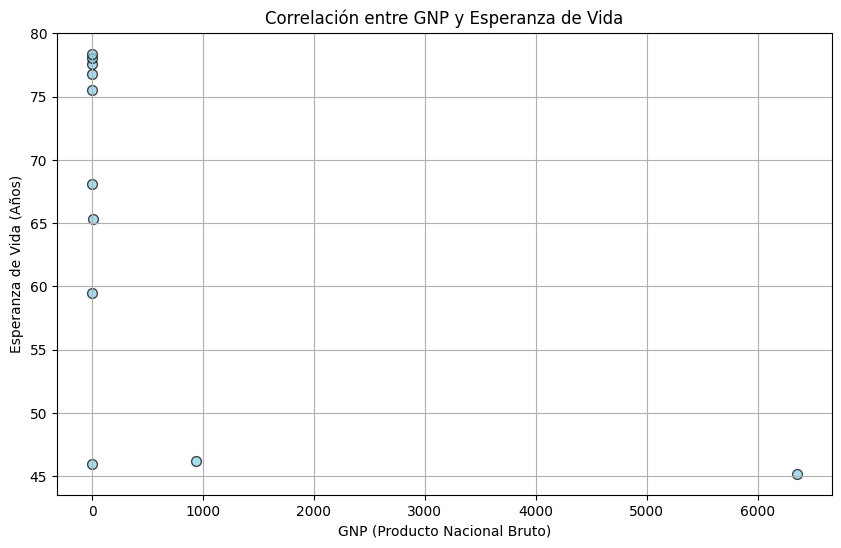

In [59]:
# Consulta SQL corregida: ahora incluye GNP en la selección
query_esperanza_vida_vulnerables = """
SELECT
    Name AS Pais,
    LifeExpectancy,
    GNP,  -- ¡Se agregó esta línea!
    (GNP / Population) AS GNP_per_capita
FROM
    country
WHERE
    GNP IS NOT NULL AND Population > 0
ORDER BY
    GNP_per_capita ASC
LIMIT 20;
"""

df_esperanza_vida_vulnerables = ejecutar_consulta(query_esperanza_vida_vulnerables)

if df_esperanza_vida_vulnerables is not None:
    # Eliminar filas con valores nulos en LifeExpectancy usando pandas
    df_filtrado = df_esperanza_vida_vulnerables.dropna(subset=['LifeExpectancy'])
    
    # Ordenar los resultados para un ranking claro
    df_filtrado = df_filtrado.sort_values(by='LifeExpectancy', ascending=True)

    print("Esperanza de vida en los países con el GNP per cápita más bajo (sin valores nulos):")
    print(df_filtrado)

    # El código para la correlación permanece igual
    if 'df_filtrado' in locals() and df_filtrado is not None and not df_filtrado.empty:
    
        # Calcular el coeficiente de correlación
        correlacion = df_filtrado['GNP'].corr(df_filtrado['LifeExpectancy'])
        
        # Imprimir el resultado
        print(f"\nEl coeficiente de correlación entre el GNP y la Esperanza de Vida para estos países es: {correlacion:.2f}")
    
        # Crear el gráfico de dispersión para visualizar la correlación
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.scatter(df_filtrado['GNP'], df_filtrado['LifeExpectancy'], s=50, c='skyblue', edgecolors='k', alpha=0.7)
        
        # Etiquetas y título
        plt.title('Correlación entre GNP y Esperanza de Vida')
        plt.xlabel('GNP (Producto Nacional Bruto)')
        plt.ylabel('Esperanza de Vida (Años)')
        plt.grid(True)
        plt.show()

In [60]:
# Este código se ejecuta después de haber obtenido y filtrado el DataFrame 'df_filtrado'

if 'df_filtrado' in locals() and df_filtrado is not None and not df_filtrado.empty:
    # Obtener la lista de nombres de los países prioritarios del DataFrame filtrado
    paises_a_analizar = df_filtrado['Pais'].tolist()

    # Formatear la lista para usarla en la cláusula SQL 'IN'
    paises_str = ', '.join([f"'{p}'" for p in paises_a_analizar])

    # Consulta SQL para obtener las ciudades de los países prioritarios
    # Se une la tabla 'city' con la tabla 'country' para filtrar por nombre de país
    query_ciudades_intervenir = f"""
    SELECT
        T2.Name AS Pais,
        T1.Name AS Ciudad,
        T1.Population AS Poblacion_Ciudad
    FROM
        city AS T1
    JOIN
        country AS T2 ON T1.CountryCode = T2.Code
    WHERE
        T2.Name IN ({paises_str})
    ORDER BY
        T1.Population DESC;
    """
    
    # Ejecutar la consulta y guardar el resultado en un nuevo DataFrame
    df_ciudades_intervenir = ejecutar_consulta(query_ciudades_intervenir)

    if df_ciudades_intervenir is not None:
        print("Ranking de Ciudades Prioritarias para Intervención:")
        print(df_ciudades_intervenir)
else:
    print("Error: El DataFrame 'df_filtrado' no se ha creado o está vacío. Por favor, asegúrate de ejecutar el código para el análisis de GNP y esperanza de vida primero.")


Ranking de Ciudades Prioritarias para Intervención:
                         Pais            Ciudad  Poblacion_Ciudad
0                    Ethiopia       Addis Abeba           2495000
1                     Somalia         Mogadishu            997000
2                    Ethiopia         Dire Dawa            164851
3                    Ethiopia            Nazret            127842
4                    Ethiopia            Gonder            112249
5                    Ethiopia              Dese             97314
6                    Ethiopia            Mekele             96938
7                    Ethiopia         Bahir Dar             96140
8                     Somalia          Hargeysa             90000
9                     Somalia          Kismaayo             90000
10      Sao Tome and Principe          São Tomé             49541
11                 East Timor              Dili             47900
12              Faroe Islands          Tórshavn             14542
13                  Gree